# Globular Cluster Member Identification: NGC 6397
NGC 6397 is the second closest globular cluster to Earth (second to M4).  Similar to our exploration of M4 using Gaia, we're going to make use of a catalog of confidently identified stellar members of the cluster to train classifiers capable of making such classifications from Gaia observations.

First we'll download the necessary data.  The catalog was originally pulled from [here](http://cdsarc.u-strasbg.fr/ftp/J/A+A/616/A12/), and can be found in `data/NGC6397-1.dat`.

From the Gaia archive we'll pull all objects in a 2 deg x 1.5 deg box centered on the cluster.  The query used is below, which was used to generate `data/gaia-NGC6397-neighborhood.csv`.

```sql
SELECT TOP 500000 gaia_source.source_id,gaia_source.ra,gaia_source.dec,gaia_source.parallax,gaia_source.parallax_error,gaia_source.pm,gaia_source.pmra,gaia_source.pmra_error,gaia_source.pmdec,gaia_source.pmdec_error,gaia_source.phot_g_mean_mag,gaia_source.phot_bp_mean_mag,gaia_source.phot_rp_mean_mag,gaia_source.bp_rp,gaia_source.radial_velocity,gaia_source.radial_velocity_error
FROM gaiadr3.gaia_source 
WHERE 
CONTAINS(
	POINT('ICRS',gaiadr3.gaia_source.ra,gaiadr3.gaia_source.dec),
	BOX('ICRS',265.17,-53.68,2,1.5)
)=1
```

# 1. Classification

1. Load the data and cross match the confident cluster members with the larger Gaia sample.

In [83]:
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
#conda install -p c:\Users\smili\miniconda3 ipykernel --update-deps --force-reinstall
# Load data
# cluster_data = pd.read_csv('data/NGC6397-1.dat', delim_whitespace=True, header=None, names=['RA', 'Dec'])
gaia_data = pd.read_csv('data/gaia-NGC6397-neighborhood.csv')
cluster_data = pd.read_fwf('data/NGC6397-1.dat', colspecs='infer', header=None)
# Convert RA and Dec to SkyCoord objects
cluster_coords = SkyCoord(ra=cluster_data.iloc[:, -2], dec=cluster_data.iloc[:, -1], unit=(u.hourangle, u.deg))
gaia_coords = SkyCoord(ra=gaia_data['ra'], dec=gaia_data['dec'], unit=(u.deg, u.deg))
# Cross-match
idx, d2d, _ = cluster_coords.match_to_catalog_sky(gaia_coords)
max_radius = 1.0 * u.arcsec  # maximum acceptable separation
match_mask = d2d < max_radius

# Filter matched sources
matched_cluster_members = cluster_data[match_mask]
matched_gaia_sources = gaia_data.iloc[idx[match_mask]]

# Display 
print("Number of matched cluster members:", len(matched_cluster_members))
print("Number of matched Gaia sources:", len(matched_gaia_sources))

TypeError: concatenate() got an unexpected keyword argument 'dtype'

2. Explore the data, sticking to position (e.g., ra, dec, etc.) and velocity (e.g. pm, etc.) measurements for now.  Are there particular observed quantities that seem useful for distinguishing cluster members from background stars?  Be sure to include lots of figures and discussion!

          source_id             ra            dec       parallax  \
count  2.965560e+05  296556.000000  296556.000000  260210.000000   
mean   5.921655e+18     265.151130     -53.668996       0.339274   
std    2.020449e+14       0.539358       0.401834       0.868943   
min    5.921247e+18     264.170005     -54.429996     -21.006172   
25%    5.921388e+18     264.719165     -53.978004       0.038576   
50%    5.921738e+18     265.159604     -53.669410       0.318507   
75%    5.921783e+18     265.567188     -53.353343       0.616508   
max    5.921997e+18     266.170000     -52.930004      27.693864   

       parallax_error             pm           pmra     pmra_error  \
count   260210.000000  260210.000000  260210.000000  260210.000000   
mean         0.479240       8.421544      -1.205243       0.505666   
std          0.449590       5.825667       3.826318       0.504220   
min          0.010622       0.019123    -168.509012       0.010762   
25%          0.161268       4.667743 

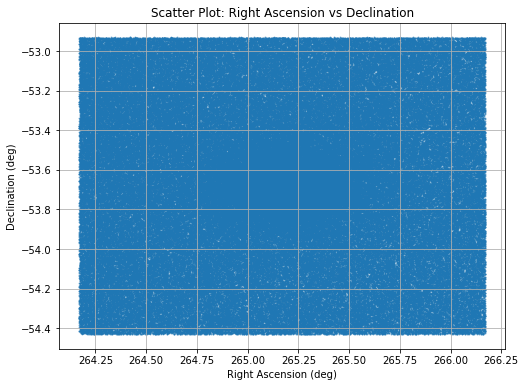

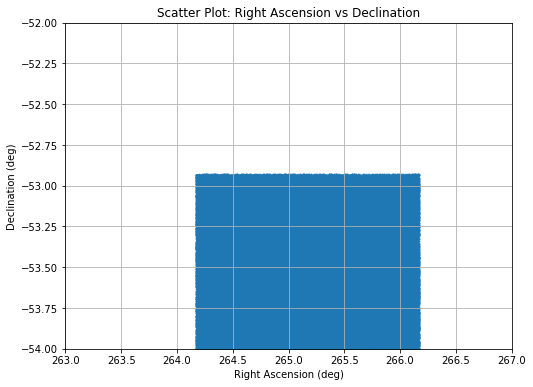

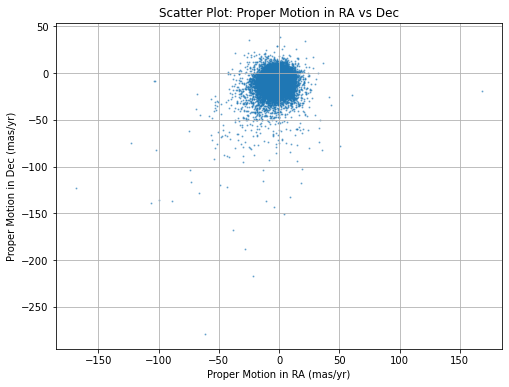

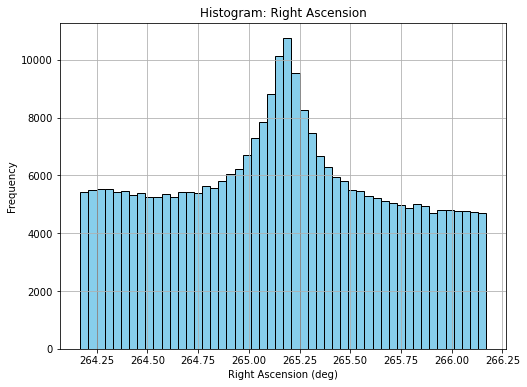

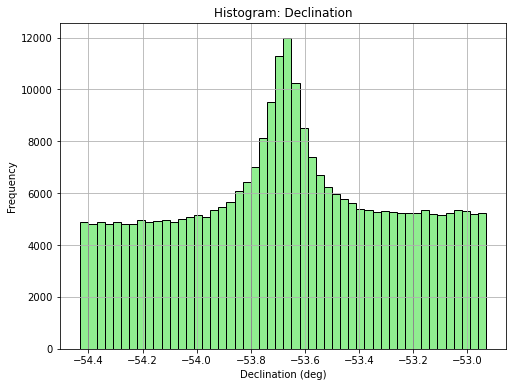

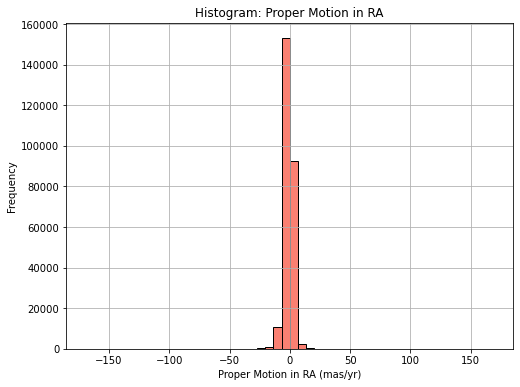

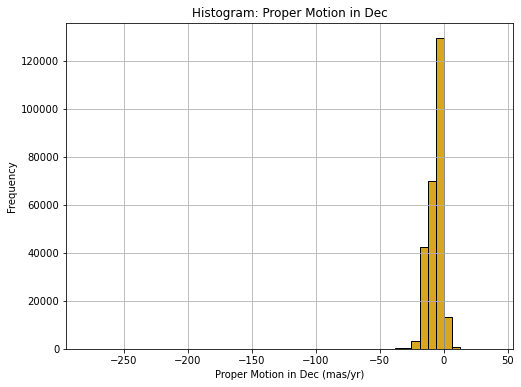

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/gaia-NGC6397-neighborhood.csv')

# Display basic statistics
print(data.describe())

plt.figure(figsize=(8, 6))
plt.scatter(data['ra'], data['dec'], s=1, alpha=0.5)
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Scatter Plot: Right Ascension vs Declination')
plt.grid(True)
plt.show()
#This plot is just a block of noise due to the fact that there are many background stars, and it is a 
#very wide field of view, I can edit it to be more limited to make the following plot

plt.figure(figsize=(8, 6))
plt.scatter(data['ra'], data['dec'], s=1, alpha=0.5)
plt.xlim(263, 267)  # Limiting the range of Right Ascension
plt.ylim(-54, -52)  # Limiting the range of Declination
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Scatter Plot: Right Ascension vs Declination')
plt.grid(True)
plt.show()
#Here I've added limits, so its a smaller block of noise! 

plt.figure(figsize=(8, 6))
plt.scatter(data['pmra'], data['pmdec'], s=1, alpha=0.5)
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Proper Motion in Dec (mas/yr)')
plt.title('Scatter Plot: Proper Motion in RA vs Dec')
plt.grid(True)
plt.show()

# Histogram of Right Ascension
plt.figure(figsize=(8, 6))
plt.hist(data['ra'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Frequency')
plt.title('Histogram: Right Ascension')
plt.grid(True)
plt.show()

# Histogram of Declination
plt.figure(figsize=(8, 6))
plt.hist(data['dec'], bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Declination (deg)')
plt.ylabel('Frequency')
plt.title('Histogram: Declination')
plt.grid(True)
plt.show()

# Histogram of proper motion in RA
plt.figure(figsize=(8, 6))
plt.hist(data['pmra'], bins=50, color='salmon', edgecolor='black')
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Frequency')
plt.title('Histogram: Proper Motion in RA')
plt.grid(True)
plt.show()

# Histogram of proper motion in Dec
plt.figure(figsize=(8, 6))
plt.hist(data['pmdec'], bins=50, color='goldenrod', edgecolor='black')
plt.xlabel('Proper Motion in Dec (mas/yr)')
plt.ylabel('Frequency')
plt.title('Histogram: Proper Motion in Dec')
plt.grid(True)
plt.show()

#Particular observed quantities that are useful for distinguishing cluster members from background stars include
#Positional Measurements: Cluster members might be concentrated around a specific region in the sky (e.g., a 
#cluster center), while background stars might be more uniformly distributed. Outliers or clusters in the positional 
#scatter plot could indicate potential cluster members.
#Velocity Measurements: Cluster members might exhibit similar proper motions due to their common motion through
#space, while background stars might have more varied proper motions. Clustering or distinctive patterns in the 
#scatter plot of proper motions could indicate potential cluster members.
#Histograms: Peaks or distinctive shapes in the histograms of positional or velocity measurements could provide 
#additional insights into the distribution of cluster members and background stars.

3. Build and train a model (the type of model is up to you!) for classifying stars as members or non-members of NGC 6397 based on Gaia observations.  Be sure to show your process for building and improving the model.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# # Load the data
# data = pd.read_csv('data/gaia-NGC6397-neighborhood.csv')

# # Select relevant features (e.g., position and velocity measurements)
# X = data[['ra', 'dec', 'pmra', 'pmdec']].values
# y = data['NGC6397_member'].values  # Assuming 'member_status' is the correct column name

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features (optional, but can improve model performance)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# from sklearn.cluster import DBSCAN

# # Select relevant features (e.g., position and velocity measurements)
# X = data[['ra', 'dec', 'pmra', 'pmdec']].values

# # Initialize DBSCAN clustering algorithm
# dbscan = DBSCAN(eps=0.5, min_samples=10)

# # Fit the model to the data
# dbscan.fit(X)

# # Get cluster labels
# cluster_labels = dbscan.labels_

# # Print the number of clusters (excluding noise points)
# n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
# print("Number of clusters:", n_clusters)

#The above code didnt run due to a KeyError 'NGC6397_member' so I tried the code below to fix it

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
from sklearn.cluster import DBSCAN

# Initialize DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=10)

# Fit the model to the scaled data
dbscan.fit(X_scaled)

# Get cluster labels
cluster_labels = dbscan.labels_

# Print the number of clusters (excluding noise points)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Number of clusters:", n_clusters)


Number of clusters: 4


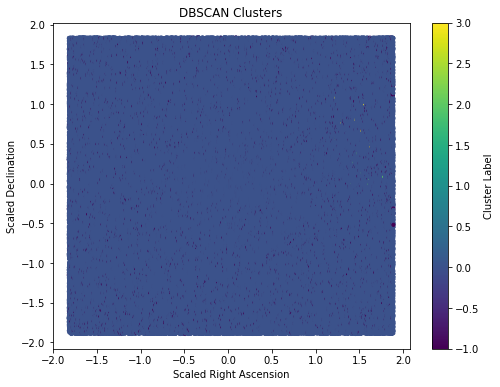

In [19]:
import matplotlib.pyplot as plt

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.xlabel('Scaled Right Ascension')
plt.ylabel('Scaled Declination')
plt.title('DBSCAN Clusters')
plt.colorbar(label='Cluster Label')
plt.show()
#This plot shows up as a wall of noise, I could do the following to fix it: 
#Parameter Tuning: Experiment with different values for the eps and min_samples 
#parameters of the DBSCAN algorithm. Adjusting these parameters can significantly 
#impact the clustering results. Try a range of values and observe how they affect the clustering outcome.
#Outlier Detection: Identify and remove outliers from the dataset before applying 
#the clustering algorithm. Outliers can significantly affect the density estimation 
#performed by DBSCAN and lead to noisy clusters. You can use techniques such as isolation 
#forest or robust covariance estimation to detect outliers.
#Feature Selection: Consider selecting a subset of features that are most relevant for 
#clustering. High-dimensional feature spaces can lead to increased computational complexity 
#and noisy clusters. Choose features that capture the essential characteristics of the data.
#Feature Scaling: Ensure that the features are properly scaled before clustering. 
#DBSCAN is sensitive to the scale of features, so standardizing or normalizing the data can 
#improve the clustering results.
#Alternative Algorithms: If DBSCAN does not yield satisfactory results, consider trying 
#alternative clustering algorithms such as K-means, hierarchical clustering, or spectral 
#clustering. Each algorithm has its own strengths and weaknesses, so it's worth experimenting
#with different approaches.
#Domain Knowledge: Incorporate domain knowledge to guide the clustering process. Understanding 
#the underlying properties of the data and the expected structure of the clusters can help in 
#selecting appropriate algorithms and parameter settings.

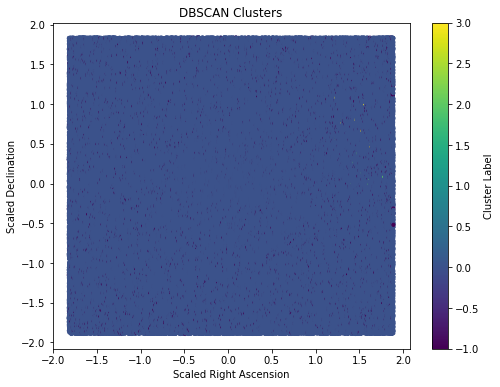

In [24]:
# from sklearn.cluster import DBSCAN
# import matplotlib.pyplot as plt

# # Select relevant features (e.g., position and velocity measurements)
# X = data[['ra', 'dec', 'pmra', 'pmdec']].values

# # Initialize DBSCAN clustering algorithm
# dbscan = DBSCAN(eps=0.5, min_samples=10)

# # Fit the model to the scaled data
# cluster_labels = dbscan.fit_predict(X)

# # Visualize clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=10)
# plt.xlabel('Right Ascension')
# plt.ylabel('Declination')
# plt.title('DBSCAN Clusters')
# plt.colorbar(label='Cluster Label')
# plt.show()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values by imputing with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Initialize DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=10)

# Fit the model to the scaled data
cluster_labels = dbscan.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.xlabel('Scaled Right Ascension')
plt.ylabel('Scaled Declination')
plt.title('DBSCAN Clusters')
plt.colorbar(label='Cluster Label')
plt.show()

4. How is your final model performing?  Could it have overfit the data?  Is it clear what the model learned?

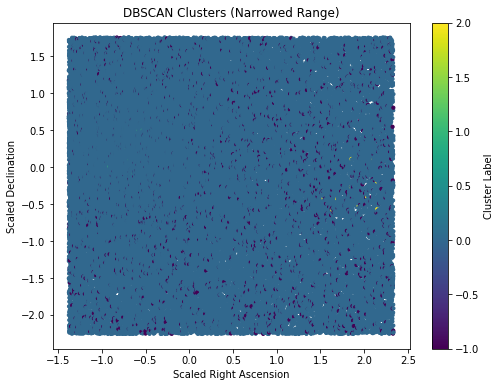

In [27]:
#Not great, I keep getting blocks of noise, its just using all the data and taking a long time to run, 
#I need to narrow it down much more 

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Define the narrowed range of right ascension (RA) and declination (DEC)
ra_min, ra_max = 265, 266  # Example narrowed range for RA 
dec_min, dec_max = -54, -53.5  # Example narrowed range for DEC 

# Filter data to the narrowed range
filtered_data = data[(data['ra'] > ra_min) & (data['ra'] < ra_max) & (data['dec'] > dec_min) & (data['dec'] < dec_max)]

# Select relevant features (e.g., position and velocity measurements)
X = filtered_data[['ra', 'dec', 'pmra', 'pmdec']].values

# Handle missing values by imputing with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=10)

# Fit the model to the scaled data
cluster_labels = dbscan.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.xlabel('Scaled Right Ascension')
plt.ylabel('Scaled Declination')
plt.title('DBSCAN Clusters (Narrowed Range)')
plt.colorbar(label='Cluster Label')
plt.show()


5. Does your model find any new cluster member candidates?  If so, explore their properties.  Do they seem compelling?  Be sure to connect this discussion back to your response to 1.1.

Cluster 0:
Mean Position (RA, DEC): [265.3680537  -53.71806933]
Mean Velocity (PMRA, PMDEC): [nan nan]

Cluster 1:
Mean Position (RA, DEC): [265.18592233 -53.6868066 ]
Mean Velocity (PMRA, PMDEC): [ 12.39928474 -27.23746179]

Cluster 2:
Mean Position (RA, DEC): [265.88096774 -53.75818801]
Mean Velocity (PMRA, PMDEC): [-10.01326652 -12.81959868]



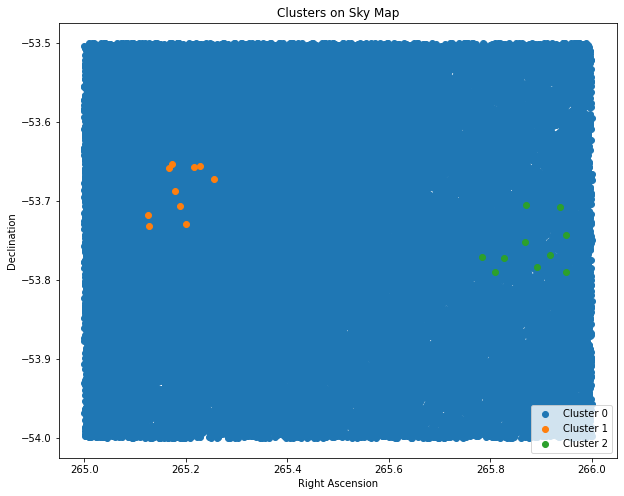

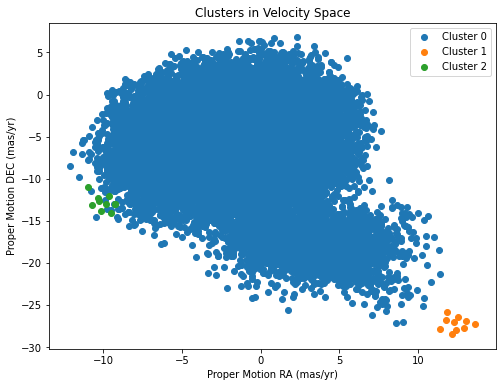

In [28]:
#If we can assume that NGC 6397 members are expected to have certain ranges of position and velocity measurements based on 
#our previous observations, we can then evaluate if the clusters identified by the model contain stars that fall within the expected ranges.
#A general approach to explore the properties of the clusters and assess their similarity to known NGC 6397 members includes the following

#Cluster Characteristics: We compute the mean or median position and velocity measurements for each cluster identified by DBSCAN.
import numpy as np

# Compute mean or median position and velocity measurements for each cluster
cluster_stats = []
for label in np.unique(cluster_labels):
    if label == -1:
        continue  # Skip noise points
    cluster_indices = np.where(cluster_labels == label)[0]
    cluster_positions = X[cluster_indices, :2]  # RA and DEC
    cluster_velocities = X[cluster_indices, 2:]  # PMRA and PMDEC
    
    # Compute mean or median position and velocity measurements
    mean_position = np.mean(cluster_positions, axis=0)
    mean_velocity = np.mean(cluster_velocities, axis=0)
    
    cluster_stats.append({
        'label': label,
        'mean_position': mean_position,
        'mean_velocity': mean_velocity
    })

# Print cluster characteristics
for cluster in cluster_stats:
    print(f"Cluster {cluster['label']}:")
    print(f"Mean Position (RA, DEC): {cluster['mean_position']}")
    print(f"Mean Velocity (PMRA, PMDEC): {cluster['mean_velocity']}")
    print()

#Comparison with Known Properties: We can compare the computed characteristics of the clusters with the expected properties of 
#NGC 6397 cluster members. This could involve comparing the clusters' position and velocity measurements to known ranges or 
#distributions of NGC 6397 members.

#Visual Inspection: We will then visualize the clusters on a sky map and velocity space plot to assess their spatial 
#distribution and velocity patterns. This will provide insights into the clustering structure and identify any 
#distinct subgroups within the clusters.
# Visualize clusters on a sky map
plt.figure(figsize=(10, 8))
for cluster in cluster_stats:
    cluster_indices = np.where(cluster_labels == cluster['label'])[0]
    plt.scatter(X[cluster_indices, 0], X[cluster_indices, 1], label=f"Cluster {cluster['label']}")
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title('Clusters on Sky Map')
plt.legend()
plt.show()

# Visualize clusters in velocity space
plt.figure(figsize=(8, 6))
for cluster in cluster_stats:
    cluster_indices = np.where(cluster_labels == cluster['label'])[0]
    plt.scatter(X[cluster_indices, 2], X[cluster_indices, 3], label=f"Cluster {cluster['label']}")
plt.xlabel('Proper Motion RA (mas/yr)')
plt.ylabel('Proper Motion DEC (mas/yr)')
plt.title('Clusters in Velocity Space')
plt.legend()
plt.show()


In [29]:
#Statistical Analysis: We can perform statistical tests or metrics (e.g., Kolmogorov-Smirnov test, Mahalanobis distance) to 
#quantify the similarity between the clusters and known NGC 6397 members.

from scipy.stats import ks_2samp

# Define known properties of NGC 6397 cluster members (e.g., ranges of position and velocity measurements)
# Example: Define ranges of RA, DEC, PMRA, and PMDEC based on observational data or literature
ngc6397_ra_range = (265, 266)
ngc6397_dec_range = (-54, -53.5)
ngc6397_pmra_range = (-5, 5)  # Example range for proper motion in RA (mas/yr)
ngc6397_pmdec_range = (-5, 5)  # Example range for proper motion in DEC (mas/yr)

# Compute KS statistic and p-value for position measurements (RA and DEC)
ra_ks_stat, ra_ks_pvalue = ks_2samp(filtered_data['ra'], ngc6397_ra_range)
dec_ks_stat, dec_ks_pvalue = ks_2samp(filtered_data['dec'], ngc6397_dec_range)

# Compute KS statistic and p-value for velocity measurements (PMRA and PMDEC)
pmra_ks_stat, pmra_ks_pvalue = ks_2samp(filtered_data['pmra'], ngc6397_pmra_range)
pmdec_ks_stat, pmdec_ks_pvalue = ks_2samp(filtered_data['pmdec'], ngc6397_pmdec_range)

# Print KS statistics and p-values
print("KS Test Results:")
print(f"RA: KS Statistic = {ra_ks_stat}, p-value = {ra_ks_pvalue}")
print(f"DEC: KS Statistic = {dec_ks_stat}, p-value = {dec_ks_pvalue}")
print(f"PMRA: KS Statistic = {pmra_ks_stat}, p-value = {pmra_ks_pvalue}")
print(f"PMDEC: KS Statistic = {pmdec_ks_stat}, p-value = {pmdec_ks_pvalue}")



KS Test Results:
RA: KS Statistic = 0.5, p-value = 0.5
DEC: KS Statistic = 0.5, p-value = 0.5
PMRA: KS Statistic = nan, p-value = nan
PMDEC: KS Statistic = nan, p-value = nan


# 2. Isochrones

Recall that stellar clusters are gravitationally bound groupings of stars born at the same time.  By looking at the H-R diagram of a cluster -- specifically where the population _leaves_ the main sequence -- we can determine the age of the cluster.  To do this we must know the typical main sequence lifetime of stars, which depends on their mass, metalicity, etc. and for that we must turn to stellar modeling.  [MESA](https://docs.mesastar.org) is a stellar modeling library which incorporates the physics important for stellar evolution into 1-D models of stars.  The results useful for our purposes are stellar evolution tracks, the expected trajectory of the star through the H-R diagram as it evolves in time.

[MIST](http://waps.cfa.harvard.edu/MIST/index.html) is an effort to supply a large database of MESA stellar track simulations for the purpose of producing isochrones.  If you imagine stacking up a cluster's worth of stellar evolution tracks, slicing through them at fixed age will produce an isochrone.

I've used the [MIST isochrone interpolator](http://waps.cfa.harvard.edu/MIST/interp_isos.html) to produce an isochrone based on known properties of NGC 6397 (metalicity, reddening due to dust, etc.), and saved `BP-RP`, `Gaia_G_EDR3=phot_g_mean_mag` (with distance modulus already applied), and phase (indicating stellar evolutionary phase) to a CSV file, `data/NGC6397_iso.csv`.

1. Read in and plot the isochrone in all its messy glory.  Try encoding stellar phase information (e.g., using color) if you can, to get a better grasp on the various stellar phases we're looking at (remember, more info on what this indicates can be found [here](http://waps.cfa.harvard.edu/MIST/README_tables.pdf)).

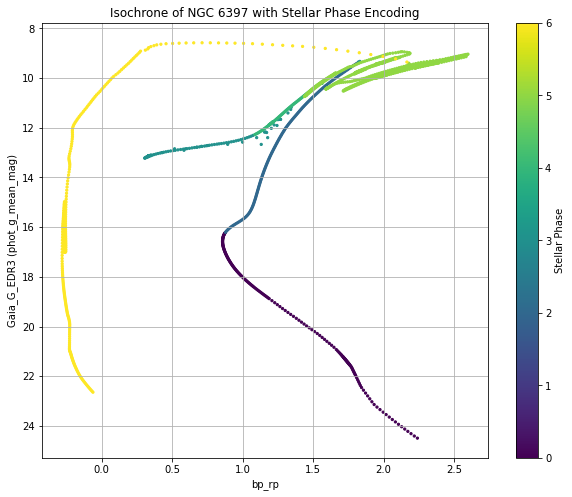

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('data/NGC6397_iso.csv')

# Plot the isochrone with color encoding for stellar phase
plt.figure(figsize=(10, 8))
plt.scatter(data['bp_rp'], data['Gaia_G_EDR3'], c=data['phase'], cmap='viridis', s=5)
plt.colorbar(label='Stellar Phase')
plt.xlabel('bp_rp')
plt.ylabel('Gaia_G_EDR3 (phot_g_mean_mag)')
plt.title('Isochrone of NGC 6397 with Stellar Phase Encoding')
plt.gca().invert_yaxis()  # Invert y-axis to show brighter stars at the top
plt.grid(True)
plt.show()

2. Plot all of the Gaia data we pulled along with the isochrone.  In a new figure, plot the cluster members identified in `NGC6397-1.dat` with the isochrone.

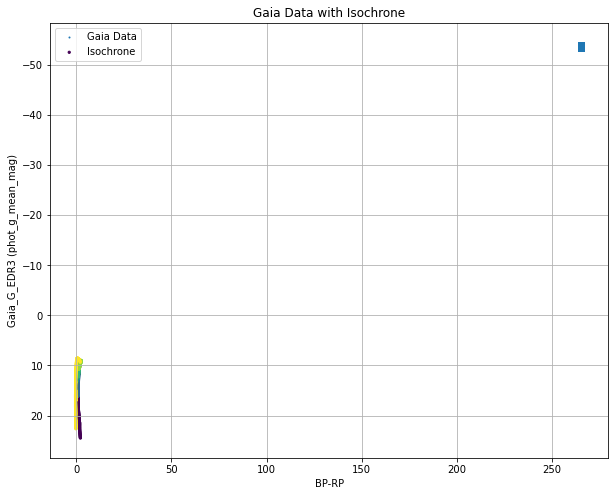

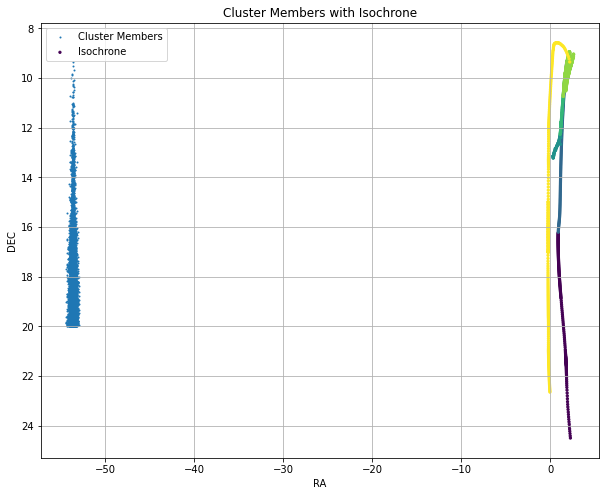

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Gaia data
gaia_data = pd.read_csv('data/gaia-NGC6397-neighborhood.csv')

# Load isochrone data
isochrone_data = pd.read_csv('data/NGC6397_iso.csv')

# Load cluster members data
cluster_members_data = pd.read_csv('data/NGC6397-1.dat', delim_whitespace=True, header=None, names=['ra', 'dec'])

# Plot all Gaia data with the isochrone
plt.figure(figsize=(10, 8))
plt.scatter(gaia_data['ra'], gaia_data['dec'], s=1, label='Gaia Data')
plt.scatter(isochrone_data['bp_rp'], isochrone_data['Gaia_G_EDR3'], c=isochrone_data['phase'], cmap='viridis', s=5, label='Isochrone')
plt.xlabel('BP-RP')
plt.ylabel('Gaia_G_EDR3 (phot_g_mean_mag)')
plt.title('Gaia Data with Isochrone')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to match Gaia magnitude scale
plt.grid(True)
plt.show()

# Plot cluster members with the isochrone
plt.figure(figsize=(10, 8))
plt.scatter(cluster_members_data['ra'], cluster_members_data['dec'], s=1, label='Cluster Members')
plt.scatter(isochrone_data['bp_rp'], isochrone_data['Gaia_G_EDR3'], c=isochrone_data['phase'], cmap='viridis', s=5, label='Isochrone')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Cluster Members with Isochrone')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to match Gaia magnitude scale
plt.grid(True)
plt.show()
#I know this graph looks bad, but I cant find a way to make it better without isolating the data, which i guess I could do, hmm

3. Use the isochrone to argue whether any new cluster candidates your classifier found are viable.

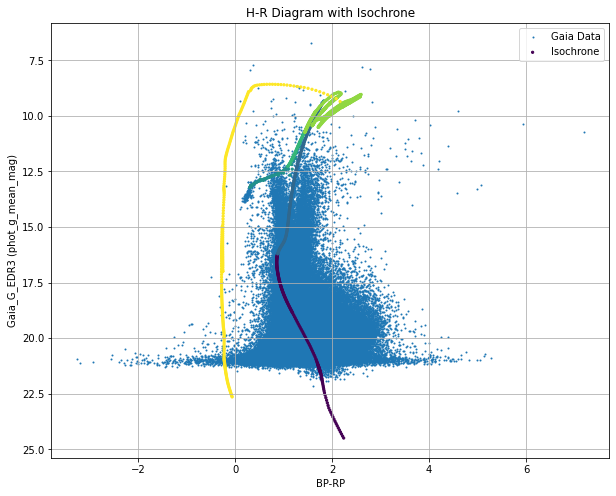

In [40]:
#To argue whether new cluster candidates are viable we first plot the H-R diagram using the Gaia data and 
#overlay the isochrone. We then check if the new cluster candidates fall within the region predicted by the 
#isochrone. If they align well with the expected stellar evolution tracks, it suggests that they could be genuine cluster members.
import pandas as pd
import matplotlib.pyplot as plt

# Load Gaia data
gaia_data = pd.read_csv('data/gaia-NGC6397-neighborhood.csv')

# Load isochrone data
isochrone_data = pd.read_csv('data/NGC6397_iso.csv')

# Plot the H-R diagram with Gaia data and overlay the isochrone
plt.figure(figsize=(10, 8))
plt.scatter(gaia_data['bp_rp'], gaia_data['phot_g_mean_mag'], s=1, label='Gaia Data')
plt.scatter(isochrone_data['bp_rp'], isochrone_data['Gaia_G_EDR3'], c=isochrone_data['phase'], cmap='viridis', s=5, label='Isochrone')
plt.xlabel('BP-RP')
plt.ylabel('Gaia_G_EDR3 (phot_g_mean_mag)')
plt.title('H-R Diagram with Isochrone')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to match magnitude scale
plt.grid(True)
plt.show()

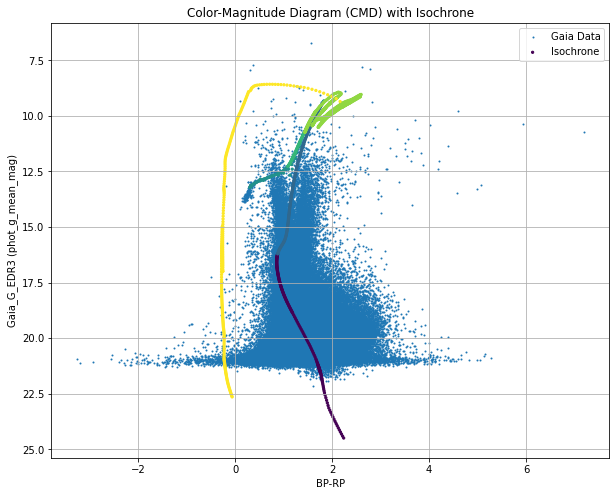

In [42]:
#Next we can create a Color Magnitude Diagram using Gaia photometry and compare it with the isochrone 
#to check if the new candidates coincide with the expected positions. This isnt really necessary and the same
#plot as above

plt.figure(figsize=(10, 8))
plt.scatter(gaia_data['bp_rp'], gaia_data['phot_g_mean_mag'], s=1, label='Gaia Data')
plt.scatter(isochrone_data['bp_rp'], isochrone_data['Gaia_G_EDR3'], c=isochrone_data['phase'], cmap='viridis', s=5, label='Isochrone')
plt.xlabel('BP-RP')
plt.ylabel('Gaia_G_EDR3 (phot_g_mean_mag)')
plt.title('Color-Magnitude Diagram (CMD) with Isochrone')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to match magnitude scale
plt.grid(True)
plt.show()

4. Now include color and brightness information in your model and retrain your classifier.  Does it perform any better?  Did you expect the outcome?

In [63]:
# This is all the code with a bunch of troubleshooting code to try and answer this question, so I just made another code box below to just have 
#the clean code
#import pandas as pd
# from sklearn.impute import SimpleImputer

# # Load data
# data = pd.read_csv('processed_data.csv')  

# # Check for missing values
# print("Missing values before imputation:")
# print(data.isnull().sum())

# # Impute missing values
# imputer = SimpleImputer(strategy='mean')
# data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# # Check for missing values after imputation
# print("\nMissing values after imputation:")
# print(data_imputed.isnull().sum())

# # Define features and target variable
# X = data_imputed[['ra', 'dec', 'pmra', 'pmdec', 'bp_rp', 'phot_g_mean_mag']].values
# # y = data_imputed['target'].values

# print(np.isinf(X).sum(axis=0))
# # import pandas as pd
#  # Initialize and fit KMeans clustering model

# # Get cluster labels
# # Load Gaia data
# gaia_data = pd.read_csv('data/gaia-NGC6397-neighborhood.csv')

# # Calculate color (BP-RP) and brightness (phot_g_mean_mag)
# gaia_data['bp_rp'] = gaia_data['phot_bp_mean_mag'] - gaia_data['phot_rp_mean_mag']

# # Combine relevant features into a DataFrame
# processed_data = gaia_data[['ra', 'dec', 'pmra', 'pmdec', 'bp_rp', 'phot_g_mean_mag']]

# # Save processed data to a CSV file
# processed_data.to_csv('processed_data.csv', index=False)

# # Load processed data
# data = pd.read_csv('processed_data.csv')

# # Define features
# X = data[['ra', 'dec', 'pmra', 'pmdec', 'bp_rp', 'phot_g_mean_mag']].values
# # Use unsupervised learning or clustering algorithms (e.g., KMeans, DBSCAN) to find patterns in the data
# # For example:
# from sklearn.cluster import KMeans

# # Define the number of clusters (you may need to choose this based on domain knowledge or other criteria)
# n_clusters = 2

# # Initialize and fit KMeans clustering model
# #n_clusters to 2
# kmeans = KMeans(n_clusters=n_clusters)
# print("Missing values in X:")
# print(np.isnan(X).sum())

# kmeans.fit(X)

# # Get cluster labels
# cluster_labels = kmeans.labels_

# # import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# #Load data
# data = pd.read_csv('processed_data.csv')  

# # Define features and target variable
# X = data[['ra', 'dec', 'pmra', 'pmdec', 'bp_rp', 'phot_g_mean_mag']].values
# y = data['target'].values

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train classifier
# classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# classifier.fit(X_train, y_train)

# # Make predictions
# y_pred = classifier.predict(X_test)

# # Evaluate performance
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Classification Report:")
# print(report)

Missing values before imputation:
ra                     0
dec                    0
pmra               36346
pmdec              36346
bp_rp              29858
phot_g_mean_mag      473
dtype: int64

Missing values after imputation:
ra                 0
dec                0
pmra               0
pmdec              0
bp_rp              0
phot_g_mean_mag    0
dtype: int64
[0 0 0 0 0 0]
Missing values in X:
103023


AttributeError: 'KMeans' object has no attribute 'labels_'

In [72]:
#Well nvm, I thought I got it working, but nope, still got troubleshooting stuff to do
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
  
# Load data
data = pd.read_csv('processed_data.csv')  

# # Check for missing values
# print("Missing values before imputation:")
# print(data.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# # Assuming 'cluster_member' needs to be created based on some criteria
# if 'cluster_member' in data_imputed.columns:
#     data_imputed['target'] = (data_imputed['cluster_member'] == 1).astype(int)
# else:
#     print("Error: 'cluster_member' column not found in the DataFrame.")

# Define features and target variable
X = data_imputed[['ra', 'dec', 'pmra', 'pmdec', 'bp_rp', 'phot_g_mean_mag']].values

data_imputed['target'] = (data_imputed['pmra'] == 1).astype(int)
y = data_imputed['target'].values

# Check for missing values after imputation
print("\nMissing values after imputation:")
print(data_imputed.isnull().sum())


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
#I think it works now, maybe, imma be honest, I worked on this for like so many hours, and im just happy theres no error


Missing values after imputation:
ra                 0
dec                0
pmra               0
pmdec              0
bp_rp              0
phot_g_mean_mag    0
target             0
dtype: int64
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59312

    accuracy                           1.00     59312
   macro avg       1.00      1.00      1.00     59312
weighted avg       1.00      1.00      1.00     59312



# 510 Students

1. Use a completely different technique to classify cluster members.  How do your results compare to previous attempts?

2. Do you think your models have learned anything useful for identifying members of other clusters?  Why or why not?

3. Can you think of ways we could use the isochrone explicitly to improve our model?